In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

df_EDA = pd.read_csv('loan_project/SBAnational.csv')

/tmp/ipykernel_76093/2460570128.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/utilisateur/Documents/Projets/US_SBA/MLProject/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_76093/2460570128.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_EDA = pd.read_csv('loan_project/SBAnational.csv')


In [2]:
df_EDA = df_EDA.drop(['Name','ChgOffDate', 'DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr'],axis=1)
df_EDA.head()

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,...,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"


In [3]:
duplicates = df_EDA[df_EDA.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [LoanNr_ChkDgt, City, State, Zip, Bank, BankState, NAICS, ApprovalDate, ApprovalFY, Term, NoEmp, NewExist, CreateJob, RetainedJob, FranchiseCode, UrbanRural, RevLineCr, LowDoc, MIS_Status, GrAppv, SBA_Appv]
Index: []

[0 rows x 21 columns]


In [4]:
df_EDA['ApprovalFY'] = pd.to_numeric(df_EDA['ApprovalFY'], errors='coerce')

df_EDA = df_EDA.dropna()
df_EDA

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997.0,84,...,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997.0,60,...,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997.0,180,...,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997.0,60,...,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997.0,240,...,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997.0,60,...,1.0,0,0,1,0,0,N,P I F,"$70,000.00","$56,000.00"
899160,9995603000,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997.0,60,...,1.0,0,0,1,0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,9995613003,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997.0,108,...,1.0,0,0,1,0,N,N,P I F,"$300,000.00","$225,000.00"
899162,9995973006,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997.0,60,...,1.0,0,0,1,0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


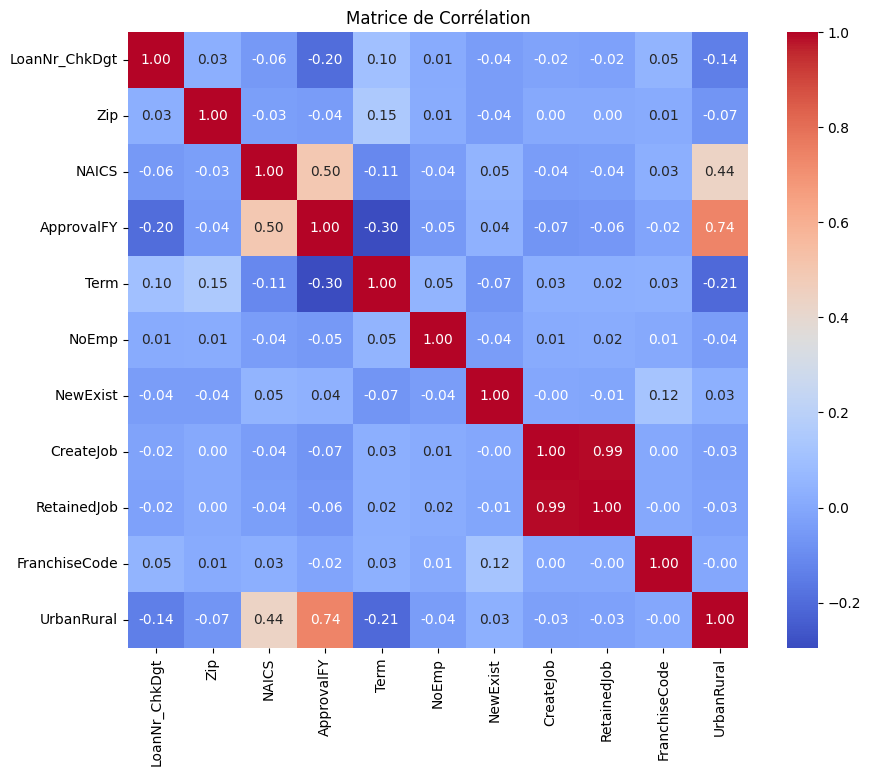

In [5]:
num_col = list(df_EDA.select_dtypes(include=[float,int]).columns)

correlation_matrix = df_EDA[num_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrice de Corrélation')

plt.show()

In [7]:
my_report = sv.analyze(df_EDA)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Ouverture dans la session de navigateur existante.


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/utilisateur/snap/code/common/.cache/gio-modules/libgiolibproxy.so
